Current Working Directory: c:\Users\wasadmin\Desktop\Capstone\data_analysis
CSV file has been created successfully at output.csv.
Missing values in each column:
name            0
phoneNumber     0
jobRole         0
workLocation    0
salary          0
role            0
email           0
username        0
password        0
managerId       1
dtype: int64
Data types of each column:
name            object
phoneNumber     object
jobRole         object
workLocation    object
salary           int64
role             int64
email           object
username        object
password        object
managerId       object
dtype: object
Distribution of the target variable (salary):
count    1.260000e+02
mean     2.622494e+05
std      1.881067e+06
min      3.730400e+04
25%      7.698075e+04
50%      9.087750e+04
75%      1.100110e+05
max      2.120740e+07
Name: salary, dtype: float64


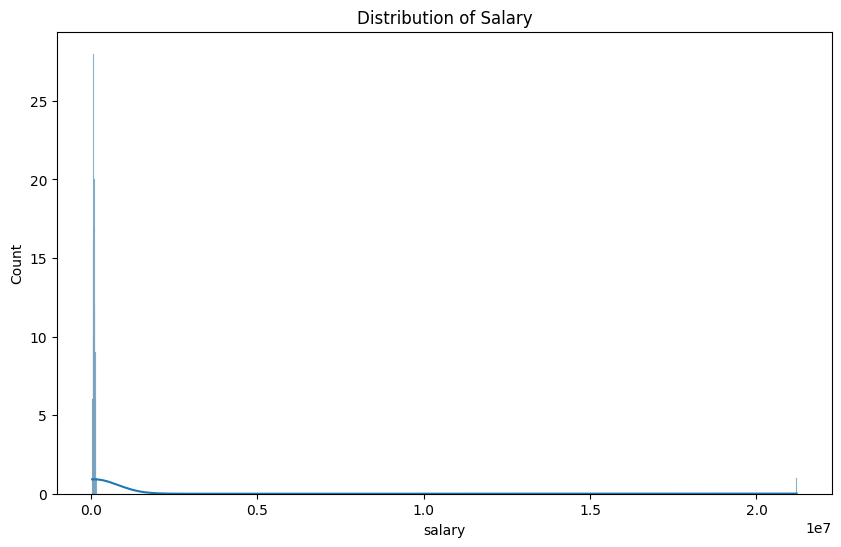

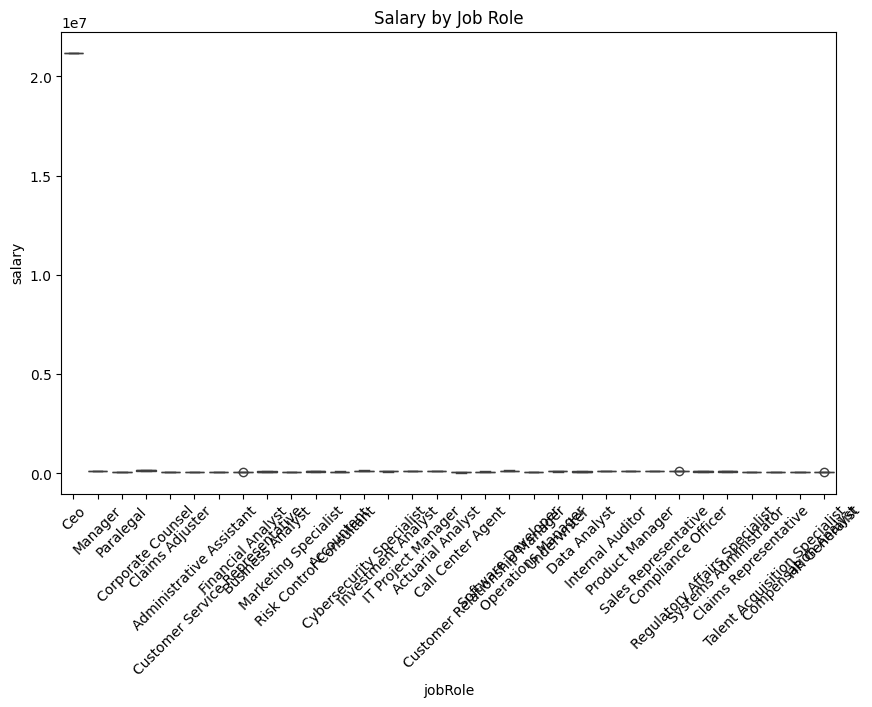

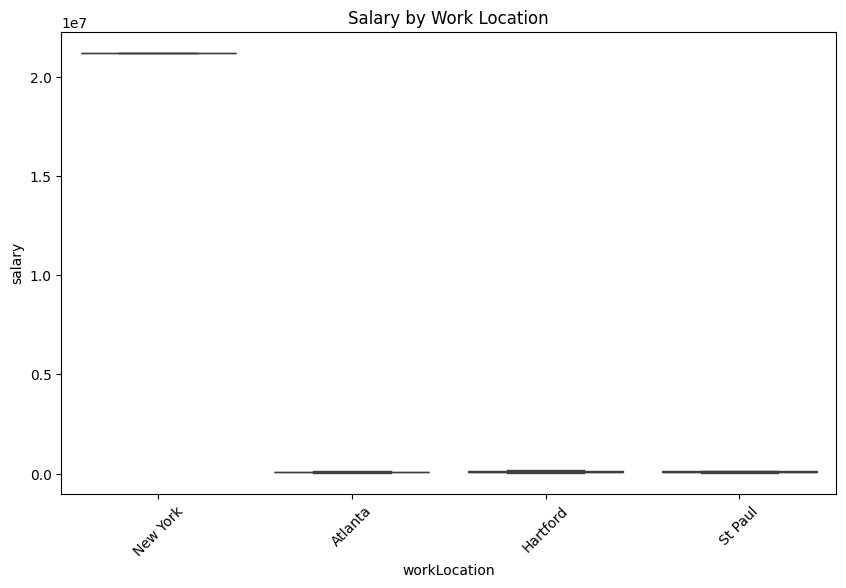

Model score (R^2): -7.512010081785506e+21
Mean Squared Error: 1.2392211718420802e+35
R^2 Score: -7.512010081785506e+21
Model has been saved to model.pkl.


In [20]:
import pandas as pd
import json
import os
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Define the relative path to the JSON file
json_file_path = os.path.join('..', 'data', 'employees.json')

# Check if the file exists
if not os.path.exists(json_file_path):
    print(f"File not found: {json_file_path}")
else:
    # Read the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # Convert the list of objects to a DataFrame
    df = pd.DataFrame(data)

    # Define the path for the output CSV file
    csv_file_path = os.path.join('output.csv')

    # Save the DataFrame to a CSV file
    df.to_csv(csv_file_path, index=False)

    print(f"CSV file has been created successfully at {csv_file_path}.")


data = pd.read_csv('output.csv')
y = data['salary']
X = pd.get_dummies(data[['jobRole', 'workLocation']])


model = LinearRegression()
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

filename = "model.pkl"

with open(filename, 'wb') as file:
    pickle.dump(model,file) 

AttributeError: 'list' object has no attribute 'head'